<a href="https://colab.research.google.com/github/SEsoNDos/Graduation-Project2-MLSC/blob/main/GraduationProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#E-commerce Customers Segmentation
**Graduation Project-2**

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pandas numpy matplotlib seaborn plotly scikit-learn imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import plotly.express as px

In [ ]:
# loading the data from csv file to a Pandas DataFrame

E_commerceCustomersSegmentation = "/content/drive/MyDrive/E-commerce_data - customers.csv"
ccs = pd.read_csv(E_commerceCustomersSegmentation)


In [ ]:
customers_df = pd.read_csv("/content/drive/MyDrive/E-commerce_data - customers.csv")
genders_df = pd.read_csv("/content/drive/MyDrive/E-commerce_data - genders.csv")
cities_df = pd.read_csv("/content/drive/MyDrive/E-commerce_data - cities.csv")
transactions_df = pd.read_csv("/content/drive/MyDrive/E-commerce_data - transactions.csv")
branches_df = pd.read_csv("/content/drive/MyDrive/E-commerce_data - branches.csv")
merchants_df = pd.read_csv("/content/drive/MyDrive/E-commerce_data - merchants.csv")


In [ ]:
# Display the first 5 rows of each table to check the data.
print("Customers Table:")
print(customers_df.head())

print("\nGenders Table:")
print(genders_df.head())

print("\nCities Table:")
print(cities_df.head())

print("\nTransactions Table:")
print(transactions_df.head())

print("\nBranches Table:")
print(branches_df.head())

print("\nMerchants Table:")
print(merchants_df.head())

Customers Table:
   customer_id   join_date  city_id  gender_id
0            1  2022-01-08        7          1
1            2  2023-05-02       20          2
2            3  2023-05-14       15          1
3            4  2022-11-25       11          2
4            5  2023-04-26        8          1

Genders Table:
   gender_id gender_name
0          1        Male
1          2      Female

Cities Table:
   city_id         city_name
0        1             Cairo
1        2        Alexandria
2        3              Giza
3        4  Shubra El-Kheima
4        5         Port Said

Transactions Table:
   transaction_id  customer_id transaction_date transaction_status  \
0               1          733       2024-05-11         subscribed   
1               2          631       2023-05-15             burned   
2               3          309       2022-11-13         subscribed   
3               4          695       2024-01-26         subscribed   
4               5          288       2022-10-12   

In [ ]:
# Merge customer tables with gender and city tables
customers_with_gender_and_city = customers_df.merge(genders_df, on="gender_id", how="left")
customers_with_all_info = customers_with_gender_and_city.merge(cities_df, on="city_id", how="left")

In [ ]:
# Merge transaction tables with branch and merchant tables and Customer
transactions_with_branches_and_merchants = transactions_df.merge(branches_df, on="branch_id", how="left")
transactions_with_all_info = transactions_with_branches_and_merchants.merge(merchants_df, on="merchant_id", how="left")
transactions = transactions_df.merge(customers_df, on="customer_id", how="left")

In [ ]:
# View the result after merging to make sure everything was done correctly.
print("\nCustomers with Gender and City Info:")
print(customers_with_all_info.head())

print("\nTransactions with Branch and Merchant Info:")
print(transactions_with_all_info.head())


Customers with Gender and City Info:
   customer_id   join_date  city_id  gender_id gender_name  \
0            1  2022-01-08        7          1        Male   
1            2  2023-05-02       20          2      Female   
2            3  2023-05-14       15          1        Male   
3            4  2022-11-25       11          2      Female   
4            5  2023-04-26        8          1        Male   

             city_name  
0             Mansoura  
1                Sohag  
2                Aswan  
3             Ismailia  
4  El-Mahalla El-Kubra  

Transactions with Branch and Merchant Info:
   transaction_id  customer_id transaction_date transaction_status  \
0               1          733       2024-05-11         subscribed   
1               2          631       2023-05-15             burned   
2               3          309       2022-11-13         subscribed   
3               4          695       2024-01-26         subscribed   
4               5          288       2022-10

In [ ]:
# finding the number of rows and columns
ccs.shape

(1000, 4)

In [ ]:
# getting some informations about the dataset
ccs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  1000 non-null   int64 
 1   join_date    1000 non-null   object
 2   city_id      1000 non-null   int64 
 3   gender_id    1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [ ]:
ccs.describe()

,customer_id,city_id,gender_id
count,1000.000000,1000.000000,1000.000000
mean,500.500000,10.136000,1.491000
std,288.819436,5.895953,0.500169
min,1.000000,1.000000,1.000000
25%,250.750000,5.000000,1.000000
50%,500.500000,10.000000,1.000000
75%,750.250000,15.000000,2.000000
max,1000.000000,20.000000,2.000000


from matplotlib import pyplot as plt
_df_12['customer_id'].plot(kind='hist', bins=20, title='customer_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['city_id'].plot(kind='hist', bins=20, title='city_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['gender_id'].plot(kind='hist', bins=20, title='gender_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_15.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='customer_id', y='city_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='city_id', y='gender_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['customer_id'].plot(kind='line', figsize=(8, 4), title='customer_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['city_id'].plot(kind='line', figsize=(8, 4), title='city_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_20['gender_id'].plot(kind='line', figsize=(8, 4), title='gender_id')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='customer_id', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='city_id', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='gender_id', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
#checking null values
ccs.isna().sum()

,0
customer_id,0
join_date,0
city_id,0
gender_id,0


In [ ]:
# Fill missing gender_id with mode
ccs['gender_id']=ccs['gender_id'].fillna(ccs['gender_id'].mode()[0])

In [ ]:
ccs.isna().sum().sum()

0

In [ ]:
ccs.gender_id.value_counts()

,count
gender_id,
1,509
2,491


<function matplotlib.pyplot.show(close=None, block=None)>

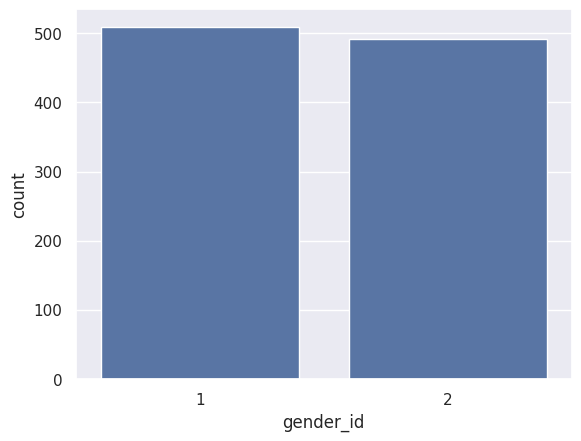

In [ ]:
#plot to check the count of male and female customer
sns.countplot(data=ccs,x='gender_id')
plt.show

In [ ]:
# Chart of customer distribution by gender
gender_counts = customers_with_all_info['gender_name'].value_counts()


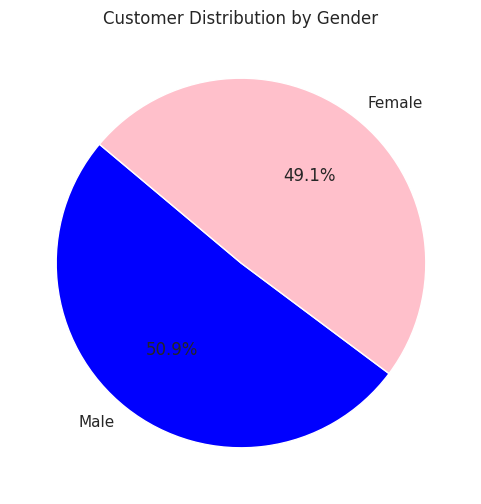

In [ ]:
# Pie Chart Drawing (Pie Chart)
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'pink'])
plt.title('Customer Distribution by Gender')
plt.show()

<ipython-input-150-ff5c706479c4>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




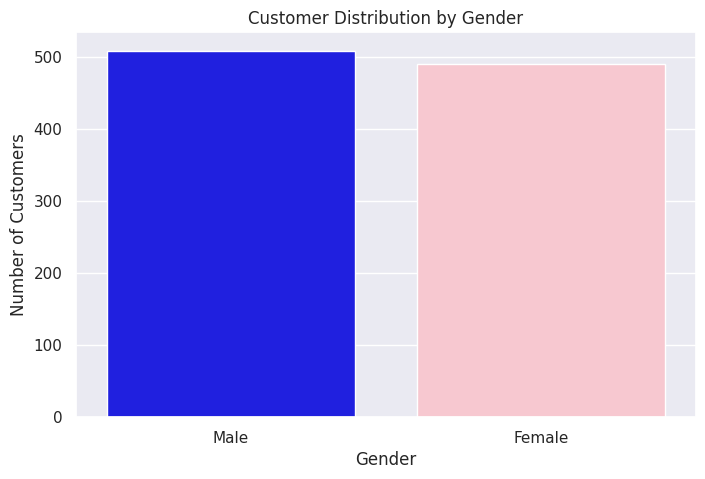

In [ ]:
# Drawing a bar chart (Bar Chart)
plt.figure(figsize=(8, 5))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution by Gender')
plt.show()

<ipython-input-129-649f0329e052>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




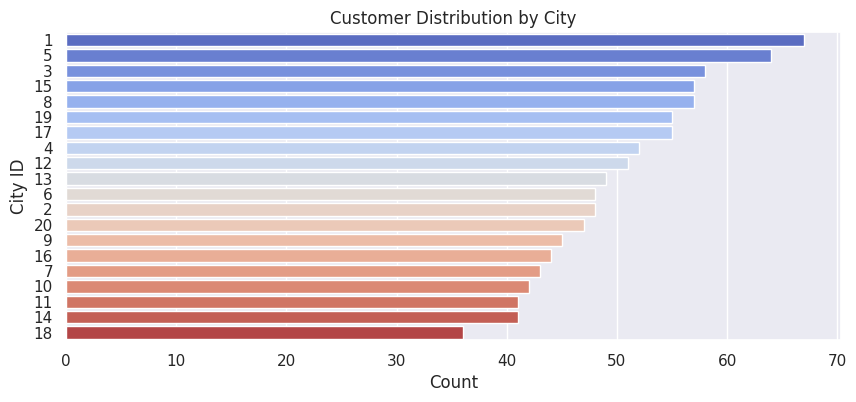

In [ ]:
# Plot customer distribution by city
plt.figure(figsize=(10, 4))
sns.countplot(data=ccs, y='city_id', order=ccs['city_id'].value_counts().index, palette="coolwarm")
plt.title("Customer Distribution by City")
plt.xlabel("Count")
plt.ylabel("City ID")
plt.show()

In [ ]:
# Calculate the number of burned transactions by city
branch_burns = transactions_df[transactions_df['transaction_status'] == 'burned'].groupby('branch_id')['transaction_id'].count()

# Branches ranked by number of transactions burned
branch_burns_sorted = branch_burns.sort_values(ascending=False)

# Show the top 10 branches with the highest number of burns
print(branch_burns_sorted.head(10))


branch_id
10    268
1     266
6     266
9     265
3     257
5     250
7     238
4     236
8     236
2     234
Name: transaction_id, dtype: int64


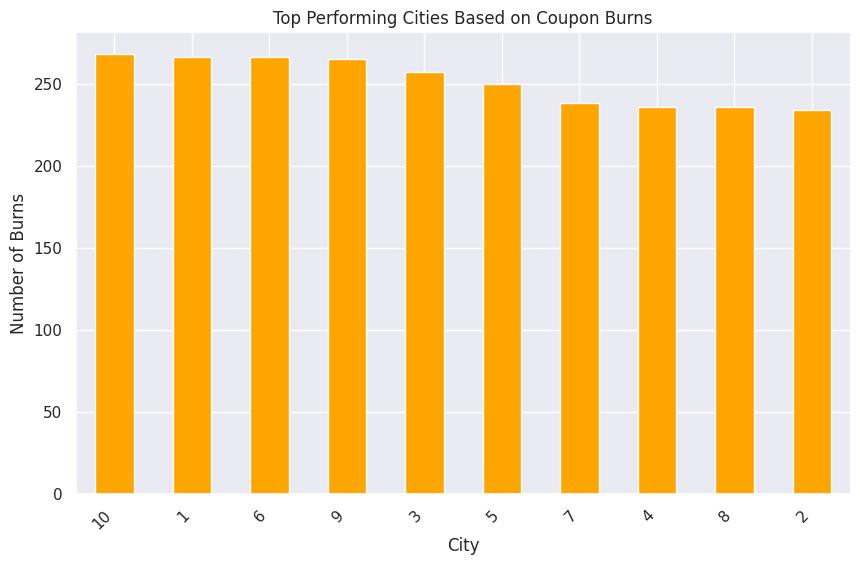

In [ ]:
# Draw a bar chart
plt.figure(figsize=(10, 6))
branch_burns_sorted.plot(kind='bar', color='orange')
plt.title("Top Performing Cities Based on Coupon Burns")
plt.xlabel("City")
plt.ylabel("Number of Burns")
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-168-1bd085cd302d>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




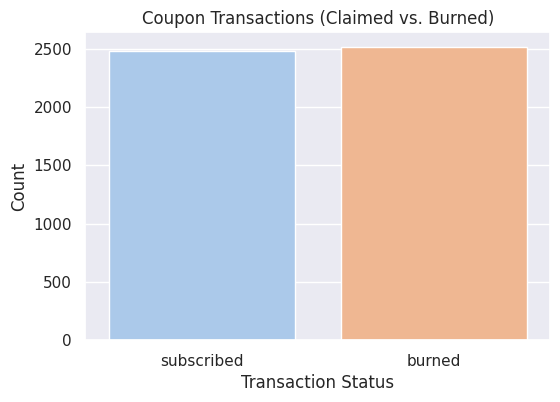

In [ ]:
#Draw the number of burned and claimed coupons
plt.figure(figsize=(6, 4))
sns.countplot(x='transaction_status', data=transactions, palette='pastel')
plt.title("Coupon Transactions (Claimed vs. Burned)")
plt.xlabel("Transaction Status")
plt.ylabel("Count")
plt.show()


In [ ]:
#Customer Segmentation using K-Means

# Select features for clustering
features = transactions.groupby("customer_id").agg({
    "transaction_id": "count",
    "burn_date": lambda x: x.notna().sum()
}).reset_index()

In [ ]:
features.rename(columns={"transaction_id": "transaction_count", "burn_date": "burned_count"}, inplace=True)
# Add burning rate
features["burn_ratio"] = features["burned_count"] / (features["transaction_count"] + 1)


In [ ]:
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features[['transaction_count', 'burn_ratio']])


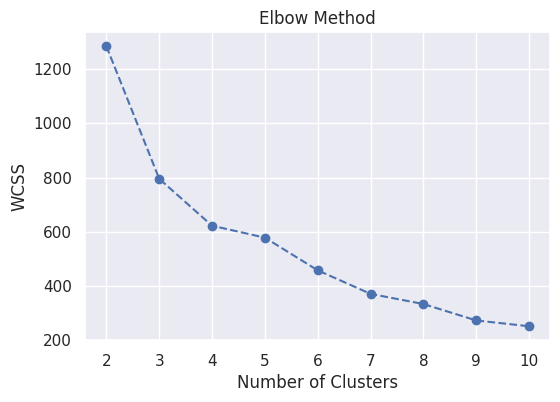

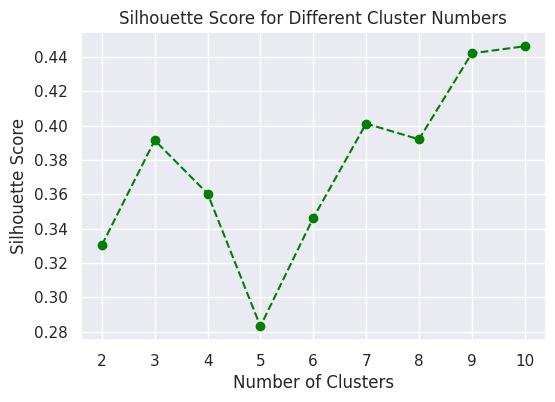

In [ ]:

wcss = []
sil_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(features_scaled, kmeans.labels_))

# Elbow diagram drawing
plt.figure(figsize=(6, 4))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

# Silhouette Score Chart
plt.figure(figsize=(6, 4))
plt.plot(range(2, 11), sil_scores, marker='o', linestyle='--', color='green')
plt.title("Silhouette Score for Different Cluster Numbers")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()



In [ ]:
# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
features['Cluster'] = kmeans.fit_predict(features_scaled)

print(features[['customer_id', 'Cluster']].head(10))


   customer_id  Cluster
0            1        0
1            2        1
2            3        1
3            4        1
4            5        2
5            6        2
6            7        1
7            8        0
8           10        0
9           11        1


<ipython-input-175-6919963af4fb>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




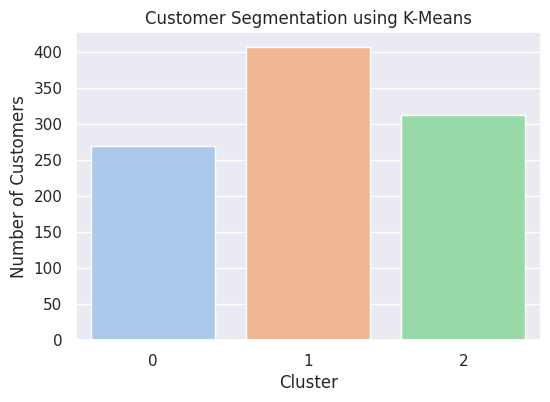

In [ ]:
#Distribution of clients by group
plt.figure(figsize=(6, 4))
sns.countplot(x='Cluster', data=features, palette='pastel')
plt.title("Customer Segmentation using K-Means")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.show()


In [ ]:
# Evaluate the model using Silhouette Score
silhouette_avg = silhouette_score(features_scaled, features['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")


Silhouette Score: 0.39


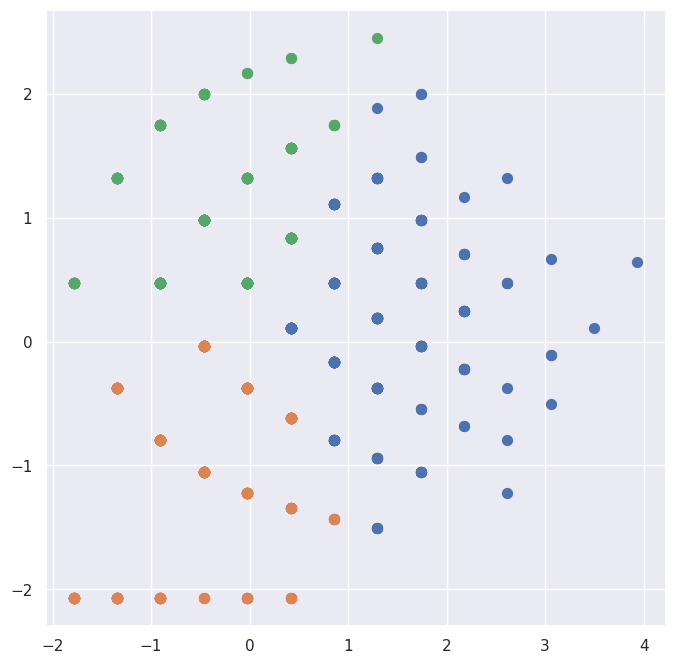

In [ ]:
# Drawing groups with centroids
plt.figure(figsize=(8, 8))
for cluster in range(3):
    plt.scatter(features_scaled[features['Cluster'] == cluster, 0],
                features_scaled[features['Cluster'] == cluster, 1],
                s=50, label=f'Cluster {cluster}')


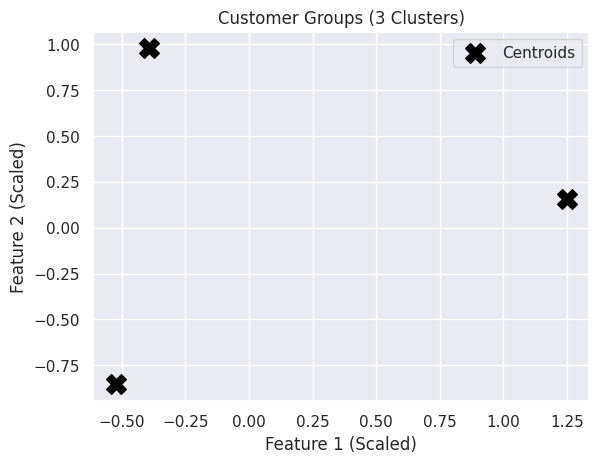

Cluster Centers:
 [[ 1.24979638  0.15644296]
 [-0.52395579 -0.85463709]
 [-0.39279624  0.97685029]]


In [ ]:
# Draw group centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='black', marker='X', label='Centroids')

plt.title('Customer Groups (3 Clusters)')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend()
plt.show()

print("Cluster Centers:\n", kmeans.cluster_centers_)

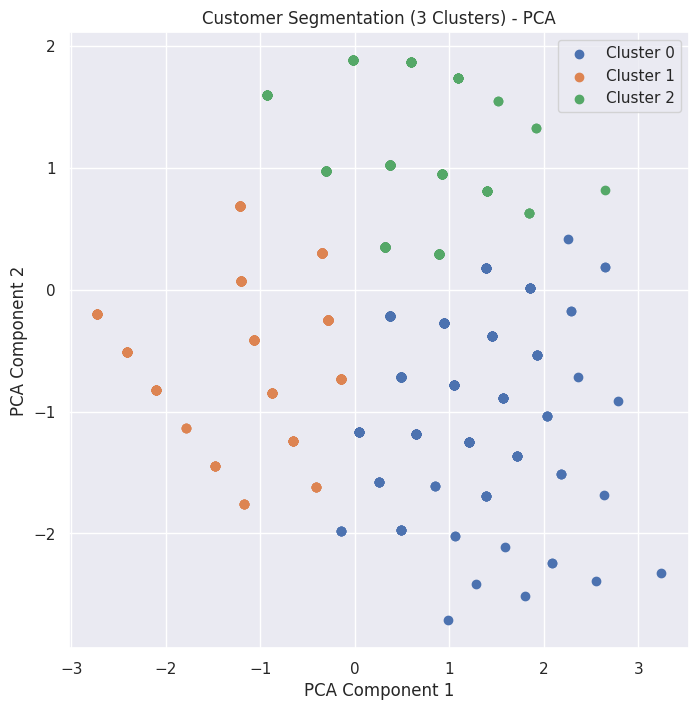

In [ ]:

# Using PCA to reduce dimensions to 2D for drawing
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

plt.figure(figsize=(8, 8))
for cluster in range(3):
    plt.scatter(features_pca[features['Cluster'] == cluster, 0],
                features_pca[features['Cluster'] == cluster, 1],
                label=f'Cluster {cluster}')

plt.title('Customer Segmentation (3 Clusters) - PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [ ]:
# Customer Distribution Analysis by City and Gender
cluster_analysis = features.merge(customers_df[['customer_id', 'city_id', 'gender_id']], on='customer_id', how='left')
cluster_summary = cluster_analysis.groupby('Cluster').agg({
    'city_id': lambda x: x.mode()[0],
    'gender_id': lambda x: x.mode()[0]
}).reset_index()

print("Cluster Analysis:\n", cluster_summary)

Cluster Analysis:
    Cluster  city_id  gender_id
0        0        4          1
1        1        1          1
2        2        5          2


In [ ]:
# Customer distribution by city and gender
fig = px.bar(cluster_analysis, x='city_id', color='gender_id', title="Customer Distribution by City and Gender")
plt.rcParams["figure.figsize"] = (6, 4)
fig.show()

In [ ]:
# Distribution of customers by groups
fig = px.pie(cluster_analysis, names='Cluster', title="Customer Segmentation")
fig.show()

#MLSC Data Science & Machine Learning Course  Batch 2
#SEng.soNDos Sofian
**Thursday**
 **6'3'2025**